# Librerias

In [1]:
%config IPCompleter.greedy=True

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import seaborn as sns
from pyodbc import ProgrammingError
from datetime import datetime

import cdx_pilotage.pims_functions as pf

# Generar csv de cada access

In [2]:
# listado de archivos access

directorio = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS'
archivos = os.listdir(directorio)

# Para saltarse alguno
# archivos = archivos[34:]

archivos

['01_January_2021-2020_11_03_V0_Results.Mdb',
 '01_January_2021-2020_11_10_V1_Results.Mdb',
 '01_January_2021-2020_11_17_V2_Results.Mdb',
 '01_January_2021-2020_11_24_V3_Results.Mdb',
 '01_January_2021-2020_12_01_V4_Results.Mdb',
 '02_February_2021-2020_11_01_V0_Results.Mdb',
 '02_February_2021-2020_12_09_V1_Results.Mdb',
 '02_February_2021-2020_12_15_V2_Results.Mdb',
 '02_February_2021-2020_12_22_V3_Results.Mdb',
 '02_February_2021-2021_01_05_V5_Results.Mdb',
 '02_February_2021-2021_05_01_V4_Alternativas_RLR_Results.Mdb',
 '03_March_2021-2021_01_05_V0_Results.Mdb',
 '03_March_2021-2021_01_12_V1_Results.Mdb',
 '03_March_2021-2021_01_19_V2_Results.Mdb',
 '03_March_2021-2021_01_26_V3_Results.Mdb',
 '04_April_2021-2021_02_02_Results.Mdb',
 '04_April_2021-2021_02_09_Results.Mdb',
 '04_April_2021-2021_02_16_Results.Mdb',
 '05_May_2021-2021-05-MayoPMC_-_EBCO_Results.Mdb',
 '05_May_2021-2021_02_23_V0_Results.Mdb',
 '05_May_2021-2021_03_02_V1_Results.Mdb',
 '05_May_2021-2021_03_09_V2_Results.M

In [3]:
# Prueba con un fichero individual

# Excel con datos crudos
excel_crudos = r"C:\Users\JESCOBARO\Desktop\CDX_PIMS\GlobalModel_CEPSA_2.12\Familias2020SpiralCrudeSDK.xlsm"
hoja_excel = "CodigosCrudos"

# Access
directorio_cdx = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS'
archivo = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS\01_January_2021-2020_12_01_V4_Results.mdb'
archivo = directorio_cdx + "\PIMS\\" + archivos[0]
ruta_csv = r"C:\Users\JESCOBARO\Desktop\df_merge_2020_12_01_V4-01_January_Results.csv"
# ruta_csv = directorio_cdx + "\PIMS_CSVS\\" + "df_merge_" + archivos[0].replace("Mdb", "csv")
tabla_primal = "RW_PrimalColumn"
tabla_sol = "PrSolution"
tabla_case = "PrCase"

# Funciones
df_crudos = pf.cargar_excel_crudos(excel_crudos, hoja_excel)
df_primalcolumn = pf.cargar_access(archivo, tabla_primal)
df_prsolution = pf.cargar_access(archivo, tabla_sol)
df_prcase = pf.cargar_access(archivo, tabla_case)
df_primal, df_sol, df_case = pf.formato_dfs_access(df_primalcolumn, df_prsolution, df_prcase)
df_merge = pf.merge_primal_solution_case_crudos(df_primal, df_sol, df_case, df_crudos, ruta_csv)

Cargado df crudos:
(148, 12)


,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
0,ABO,ABO,ABO,AO0,40.700000,0.098,7.671966,Light Sweet IMO,Nigeria,West Africa,0.602115,4.456729
1,AGB,AGBAMI,AGB,AG0,48.277746,0.043,8.009575,Light Sweet IMO,Nigeria,West Africa,0.408575,2.426031
2,AJE,AJE,AJE,AK0,41.500000,0.034,7.707608,Light Sweet IMO,Nigeria,West Africa,0.171483,3.520288


,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
151,BOS,Boscan,BOS,BC0,10.3,5.10,6.317566,Asfáltico,Venezuela,South America,NaN,NaN
152,PER,Peregrino,PER,PG0,13.7,1.76,6.469045,Asfáltico,Brasil,South America,NaN,NaN
153,ROS,Rospo Mare,ROS,RO0,12.2,6.12,6.402216,Asfáltico,Italia,Europe/Russia,NaN,NaN


Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS\01_January_2021-2020_11_03_V0_Results.Mdb;
conecction to: RW_PrimalColumn


,SolutionID,CaseID,PeriodID,NodeID,SequenceID,ColumnName,Status,Activity,Cost,LoBound,HiBound,MarginalValue,Mes,Version
0,657886895,1,0,5,25950,ASELG10,BS,1.890286,0.0,0.0,99999.0,0.0,01_January_2021,2020_11_03_V0
1,657886895,1,0,5,25951,ASELG11,BS,350.955902,0.0,0.0,420.0,0.0,01_January_2021,2020_11_03_V0
2,657886895,1,0,5,25952,ASELG12,BS,13.679293,0.0,6.0,99999.0,0.0,01_January_2021,2020_11_03_V0


Cargada tabla [RW_PrimalColumn] del access: C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS\01_January_2021-2020_11_03_V0_Results.Mdb

Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS\01_January_2021-2020_11_03_V0_Results.Mdb;
conecction to: PrSolution


,SolutionID,SystemVersion,DateTime,Description,ModelID,CompanyName,UserName,MachineName
0,657886895,19.10.50,2020-11-05 10:26:05,None,5,"Copyright © 1985-2017 Aspen Technology, Inc.",OFISERVER\GHERMIDA,CND8203V8D.CEPSACORP.ES
1,657889851,19.10.50,2020-11-05 11:20:21,None,5,"Copyright © 1985-2017 Aspen Technology, Inc.",OFISERVER\GHERMIDA,CND8203V8D.CEPSACORP.ES


Cargada tabla [PrSolution] del access: C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS\01_January_2021-2020_11_03_V0_Results.Mdb

Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS\01_January_2021-2020_11_03_V0_Results.Mdb;
conecction to: PrCase


,SolutionID,CaseID,Description,ObjectiveFunction,SolutionStatus,Passes,PropOutofTolerance,DistrOutofTolerance,SolveTime,TotalTime,...,NOTE13,NOTE14,NOTE15,NOTE16,NOTE17,NOTE18,NOTE19,NOTE20,MODIFIES,LimitedByMinMax
0,657886895,1,JAN21M3,68653.039062,1,0,0,0,225,265,...,None,None,None,None,None,None,None,None,0,0
1,657889851,103,Case 1: Sensibilidad al AP0,68393.226562,1,19,0,0,0,162,...,None,None,None,None,None,None,None,None,1,0
2,657889851,104,Case 1: Sensibilidad al AB0,68480.218750,1,25,0,0,0,177,...,None,None,None,None,None,None,None,None,1,0


Cargada tabla [PrCase] del access: C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS\01_January_2021-2020_11_03_V0_Results.Mdb

Formateando dfs ===========================


,Mes,Version,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria
448,01_January_2021,2020_11_03_V0,657886895,1,SCD11L1A,0.055488,SCD1,1L1,A
449,01_January_2021,2020_11_03_V0,657886895,1,SCD11P1A,0.096767,SCD1,1P1,A
450,01_January_2021,2020_11_03_V0,657886895,1,SCD11V1A,0.157213,SCD1,1V1,A


,SolutionID,DateTime,ModelID
0,657886895,2020-11-05 10:26:05,5
1,657889851,2020-11-05 11:20:21,5


,SolutionID,CaseID,Description,ObjectiveFunction,TotalTime
0,657886895,1,JAN21M3,68653.039062,265
1,657889851,103,Case 1: Sensibilidad al AP0,68393.226562,162
2,657889851,104,Case 1: Sensibilidad al AB0,68480.218750,177


Dfs formateados ===========================

Merge completado, guardando csv


(26763, 27)

Mes                          object
Version                      object
SolutionID                    int64
CaseID                        int64
ColumnName                   object
Activity                    float64
Submodel                     object
Crudo                        object
Refineria                    object
DateTime             datetime64[ns]
ModelID                       int64
Solution_Case                object
Description                  object
ObjectiveFunction           float64
TotalTime                     int64
TAG                          object
NAME                         object
PIMS                         object
Sin mermas                   object
API                         float64
%S                          float64
BTM                         float64
Familia + IMO                object
country                      object
region                       object
% S FV 550+                  object
% FV 550+                   float64
dtype: object

,Mes,Version,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
10,01_January_2021,2020_11_03_V0,657886895,1,SCD1ALJA,0.0,SCD1,ALJ,A,2020-11-05 10:26:05,5,657886895_1,JAN21M3,68653.039062,265,ALJ,AL JURF,ALJ,AJ0,29.82,1.900,7.187234,High Sulphur,Libya,Mediterranean,4.174994,21.863008
13,01_January_2021,2020_11_03_V0,657886895,1,SCD1ARLA,0.0,SCD1,ARL,A,2020-11-05 10:26:05,5,657886895_1,JAN21M3,68653.039062,265,ARL,ARABIA LIGERO,ARL,AR0,32.95,2.007,7.326683,High Sulphur,Saudi Arabia,Middle East,4.534699,21.252828
14,01_January_2021,2020_11_03_V0,657886895,1,SCD1ARMA,0.0,SCD1,ARM,A,2020-11-05 10:26:05,5,657886895_1,JAN21M3,68653.039062,265,ARM,ARABIA MEDIO,ARM,AM0,31.06,2.500,7.242479,High Sulphur,Saudi Arabia,Middle East,5.393416,25.878289


csv guardado C:\Users\JESCOBARO\Desktop\df_merge_2020_12_01_V4-01_January_Results.csv =====================================


In [ ]:
# Cargar Excel con datos crudos ========================================================================
excel_crudos = r"C:\Users\JESCOBARO\Desktop\CDX_PIMS\GlobalModel_CEPSA_2.12\Familias2020SpiralCrudeSDK.xlsm"
hoja_excel = "CodigosCrudos"
crudos = pf.cargar_excel_crudos(excel_crudos, hoja_excel)
# ======================================================================================================

# Generar df_merge de todos los ficheros access del directorio==========================================
directorio_cdx = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS'
tabla_primal = "RW_PrimalColumn"
tabla_sol = "PrSolution"
tabla_case = "PrCase"

print("Comienzo del proceso..." + datetime.now())
for a in archivos:
    
    # Encuentro su indice
    i = archivos.index(a)
    #Calculo progreso
    total = len(archivos)
    progreso = round(100 * (i+1)/total)
    
    archivo = directorio_cdx + "\PIMS\\" + archivos[i]
    ruta_csv = directorio_cdx + "\PIMS_CSVS\\" + "df_merge_" + archivos[i].replace("Mdb", "csv")  
    
    # Funciones
    df_primalcolumn = pf.cargar_access(archivo, tabla_primal)
    df_prsolution = pf.cargar_access(archivo, tabla_sol)
    df_prcase = pf.cargar_access(archivo, tabla_case)
    df_primal, df_sol, df_case = pf.formato_dfs_access(df_primalcolumn, df_prsolution, df_prcase)
    df_merge = pf.merge_primal_solution_case_crudos(df_primal, df_sol, df_case, crudos, ruta_csv)
    
    print("\n===========================================")
    print("Progreso: " + str(progreso) + "%")
    print("===========================================\n")


# Generar CSV con todos dfs access

In [ ]:
# listado de archivos csv

directorio_csvs = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS\PIMS_CSVS'
csvs = os.listdir(directorio_csvs)
csvs

In [ ]:
directorio_cdx = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS'
nombre_csv_final = "df_merge_012021_092021.csv"
df = pd.DataFrame()

print(datetime.now().strftime('%d-%m-%Y %H:%M:%S') + ": Comenzando el proceso...")
print("============================================================================")
for csv in csvs:
    
    # Encuentro su indice
    i = csvs.index(csv)
    #Calculo progreso
    total = len(csvs)
    progreso = round(100 * (i+1)/total)
    
    archivo = directorio_csvs + "\\" + csvs[i]
    df_aux = pd.read_csv(archivo)
    
    df = pd.concat([df, df_aux])
    
    print("Generando y uniendo df de " + csv)
    print("Progreso: " + str(progreso) + "%\tShape DataFrame resultante: ", df.shape)
    print("============================================================================")

    
print("Guardando df resultante...")
guardado = directorio_cdx + "\\" + nombre_csv_final
df.to_csv(guardado, index=False)    

print("============================================================================")
print("Df merge resultante guardado en: " + guardado)
print(datetime.now().strftime('%d-%m-%Y %H:%M:%S') + ": Proceso finalizado")
print("============================================================================")

pd.set_option('display.max_columns', None)
display(df.shape)
display(df.head(3))
pd.reset_option('display.max_columns')

# Carga y Analisis df_merge

In [2]:
directorio_cdx = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS'
nombre_csv_final = "df_merge_012021_092021.csv"
ruta = directorio_cdx + "\\" + nombre_csv_final

df = pd.read_csv(ruta) 
pd.set_option('display.max_columns', None)
display(df.dtypes)
display(df.shape)
display(df.head(3))
pd.reset_option('display.max_columns')

Mes                   object
Version               object
SolutionID             int64
CaseID                 int64
ColumnName            object
Activity             float64
Submodel              object
Crudo                 object
Refineria             object
DateTime              object
ModelID              float64
Solution_Case         object
Description           object
ObjectiveFunction    float64
TotalTime              int64
TAG                   object
NAME                  object
PIMS                  object
Sin mermas            object
API                  float64
%S                   float64
BTM                  float64
Familia + IMO         object
country               object
region                object
% S FV 550+          float64
% FV 550+            float64
dtype: object

(1778435, 27)

,Mes,Version,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
0,01_January_2021,2020_11_03_V0,657886895,1,SCD1ALJA,0.0,SCD1,ALJ,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,ALJ,AL JURF,ALJ,AJ0,29.82,1.900,7.187234,High Sulphur,Libya,Mediterranean,4.174994,21.863008
1,01_January_2021,2020_11_03_V0,657886895,1,SCD1ARLA,0.0,SCD1,ARL,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,ARL,ARABIA LIGERO,ARL,AR0,32.95,2.007,7.326683,High Sulphur,Saudi Arabia,Middle East,4.534699,21.252828
2,01_January_2021,2020_11_03_V0,657886895,1,SCD1ARMA,0.0,SCD1,ARM,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,ARM,ARABIA MEDIO,ARM,AM0,31.06,2.500,7.242479,High Sulphur,Saudi Arabia,Middle East,5.393416,25.878289


In [3]:
df_aux = pf.cases_uniques(df)

(2101, 6)

,Mes,Version,CaseID,Description,len,ordenar
0,01_January_2021,2020_11_03_V0,1,JAN21M3,7,2020-11-03
27574,01_January_2021,2020_11_10_V1,1,JAN21M3,7,2020-11-10
53526,01_January_2021,2020_11_17_V2,12,DEC20M3,7,2020-11-17
55160,01_January_2021,2020_11_17_V2,1,JAN21M3,7,2020-11-17
97644,01_January_2021,2020_11_24_V3,12,DEC20M3,7,2020-11-24
98461,01_January_2021,2020_11_24_V3,1,JAN21M3,7,2020-11-24
140128,01_January_2021,2020_12_01_V4,2,FEB21M3,7,2020-12-01
141774,01_January_2021,2020_12_01_V4,1,JAN21M3,7,2020-12-01
186126,02_February_2021,2020_11_01_V0,2,FEB21M3,7,2020-11-01
214455,02_February_2021,2020_11_01_V0,1,JAN21M3,7,2020-11-01


## Algeciras Cr1 y Cr3 LS por Familia

Filtros:
- Cases: solo los del estilo "JAN21M3" con todas sus versiones
- Refinería: A
- Submodelos: SCD2 y SCDb (Crudo 1 y Crudo 3 LS, Low  Density)
- Actividad de los crudos: > 0.2

In [6]:
pd.set_option('display.max_columns', None)

# Filtros de casos
df_algeciras = df[(df["Description"].str.len() == 7) & (df.Description != "Sin THD") & (df["CaseID"] != 81)]

print("CaseIDs uniques: ", len(df_algeciras["CaseID"].unique()), df_algeciras["CaseID"].unique())
print("CaseIDs descriptions uniques: ", len(df_algeciras["Description"].unique()), df_algeciras["Description"].unique())

# Filtros:
refineria = ["A"]
submodels = ["SCD2", "SCDb"]
activity_limit = 0.2

df_algeciras = df_algeciras[df_algeciras["Refineria"].isin(refineria)]
df_algeciras = df_algeciras[df_algeciras["Submodel"].isin(submodels)]
df_algeciras = df_algeciras[df_algeciras["Activity"] > activity_limit]

print("Refinery: ", df_algeciras["Refineria"].unique())
print("Submodels: ", df_algeciras["Submodel"].unique())
print("Activity minimal: ", df_algeciras["Activity"].min())

display(df_algeciras.head(3))

CaseIDs uniques:  10 [ 1 12  2  3  4  5  6  7  8  9]
CaseIDs descriptions uniques:  10 ['JAN21M3' 'DEC20M3' 'FEB21M3' 'MAR21M3' 'APR21M3' 'MAY21M3' 'JUN21M3'
 'JUL21M3' 'AUG21M3' 'SEP21M3']
Refinery:  ['A']
Submodels:  ['SCD2' 'SCDb']
Activity minimal:  0.3619707822799682


,Mes,Version,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
53,01_January_2021,2020_11_03_V0,657886895,1,SCD2AGBA,13.530938,SCD2,AGB,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,AGB,AGBAMI,AGB,AG0,48.277746,0.043,8.009575,Light Sweet IMO,Nigeria,West Africa,0.408575,2.426031
68,01_January_2021,2020_11_03_V0,657886895,1,SCD2BONA,9.134285,SCD2,BON,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,BON,BONGA,BON,BO0,27.700000,0.254,7.092782,High Density Sweet IMO,Nigeria,West Africa,0.657448,11.076281
70,01_January_2021,2020_11_03_V0,657886895,1,SCD2BUZA,12.959059,SCD2,BUZ,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,BUZ,BUZIOS,BUZ,BZ0,28.764706,0.280,7.140217,Heavy Sweet IMO,Brazil,South America,0.610520,26.603544


In [7]:
# Generar Pivot tables de los crudos sobre 'Familia + IMO'
df_origen = df_algeciras
submodel_cd1 =  "SCD2"
submodel_cd3 =  "SCDb"
agrupacion_imo = "Familia + IMO"
agrupacion_crudo = "Crudo"

# Pivot table Familia + IMO
table_cd1_imo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd1, agrupacion_imo)
table_cd3_imo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd3, agrupacion_imo)

# Pivot table crudo
table_cd1_crudo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd1, agrupacion_crudo)
table_cd3_crudo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd3, agrupacion_crudo)


Pivot table de Submodel SCD2 agrupado por Familia + IMO


Familia + IMO,Description,Version,CaseID,Submodel,Acid Heavy Sweet,Heavy Sweet,Heavy Sweet IMO,High Density Sweet IMO,Light Sweet,Light Sweet IMO,Month_order,Version_order
17,DEC20M3,2020_11_17_V2,12,SCD2,0.0,0.0,0.0,0.000000,129.987,147.122499,2020-12-01,2020-11-17
18,DEC20M3,2020_11_24_V3,12,SCD2,0.0,0.0,0.0,0.000000,129.987,194.462708,2020-12-01,2020-11-24
27,JAN21M3,2020_11_01_V0,1,SCD2,0.0,0.0,0.0,33.650246,0.000,204.922211,2021-01-01,2020-11-01



Casos disponibles:  [12, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Descriptions disponibles:  ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

Pivot table de Submodel SCDb agrupado por Familia + IMO


Familia + IMO,Description,Version,CaseID,Submodel,Acid Heavy Sweet,Heavy Sweet,Heavy Sweet IMO,High Density Sweet IMO,Light Sweet,Light Sweet IMO,Month_order,Version_order
17,DEC20M3,2020_11_17_V2,12,SCDb,64.9935,0.0,0.000000,75.115440,0.0,264.689137,2020-12-01,2020-11-17
18,DEC20M3,2020_11_24_V3,12,SCDb,64.9935,0.0,0.000000,129.987000,0.0,166.893097,2020-12-01,2020-11-24
27,JAN21M3,2020_11_01_V0,1,SCDb,0.0000,0.0,70.951912,26.343754,0.0,205.374626,2021-01-01,2020-11-01



Casos disponibles:  [12, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Descriptions disponibles:  ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

Pivot table de Submodel SCD2 agrupado por Crudo


Crudo,Description,Version,CaseID,Submodel,AGB,AKP,AMB,ATA,AZE,BGA,BOL,BON,BUZ,CJB,EGI,ESC,FOR,IRA,LOK,MEL,MRO,NKO,OKO,OKR,OKW,PEN,QUI,SAB,SUR,TRO,WML,WTC,WTL,YOH,ZAB,Month_order,Version_order
17,DEC20M3,2020_11_17_V2,12,SCD2,0.0,0.0,0.00000,0.0,0.0,129.987,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.679390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.44311,0.0,0.0,2020-12-01,2020-11-17
18,DEC20M3,2020_11_24_V3,12,SCD2,0.0,0.0,72.15995,0.0,0.0,129.987,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.302757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,2020-12-01,2020-11-24
27,JAN21M3,2020_11_01_V0,1,SCD2,0.0,0.0,0.00000,0.0,0.0,0.000,0.0,33.650246,0.0,0.0,0.0,204.922211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,2021-01-01,2020-11-01



Casos disponibles:  [12, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Descriptions disponibles:  ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

Pivot table de Submodel SCDb agrupado por Crudo


Crudo,Description,Version,CaseID,Submodel,AGB,AMB,ATA,AZE,BGA,BOL,BON,BUZ,CJB,EGI,ESC,FOR,JON,LOK,MEL,MRO,NKO,OKO,OKR,OKW,OTA,PEN,QUI,SAB,SUR,WML,WTC,WTL,YOH,ZAB,ZUE,Month_order,Version_order
17,DEC20M3,2020_11_17_V2,12,SCDb,0.000000,0.0,0.0,0.0,0.0,0.0,75.115440,0.000000,0.0,0.0,259.973999,0.0,0.0,64.9935,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.715137,0.0,0.0,0.0,2020-12-01,2020-11-17
18,DEC20M3,2020_11_24_V3,12,SCDb,0.000000,0.0,0.0,0.0,0.0,0.0,129.987000,0.000000,0.0,0.0,166.893097,0.0,0.0,64.9935,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2020-12-01,2020-11-24
27,JAN21M3,2020_11_01_V0,1,SCDb,60.331844,0.0,0.0,0.0,0.0,0.0,26.343754,70.951912,0.0,0.0,55.051785,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,49.994999,0.0,0.0,0.0,39.995998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2021-01-01,2020-11-01



Casos disponibles:  [12, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Descriptions disponibles:  ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']


C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


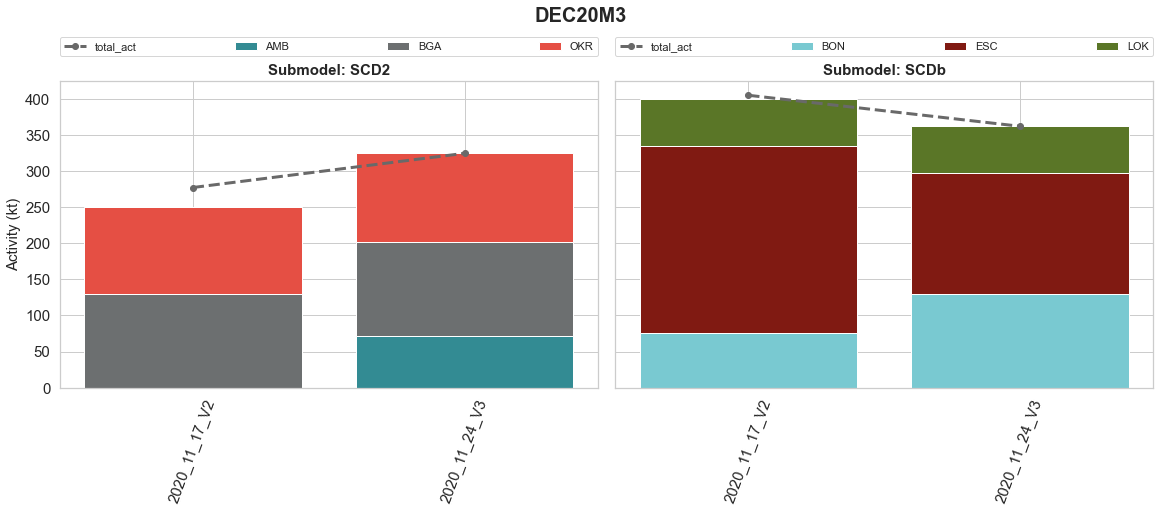

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


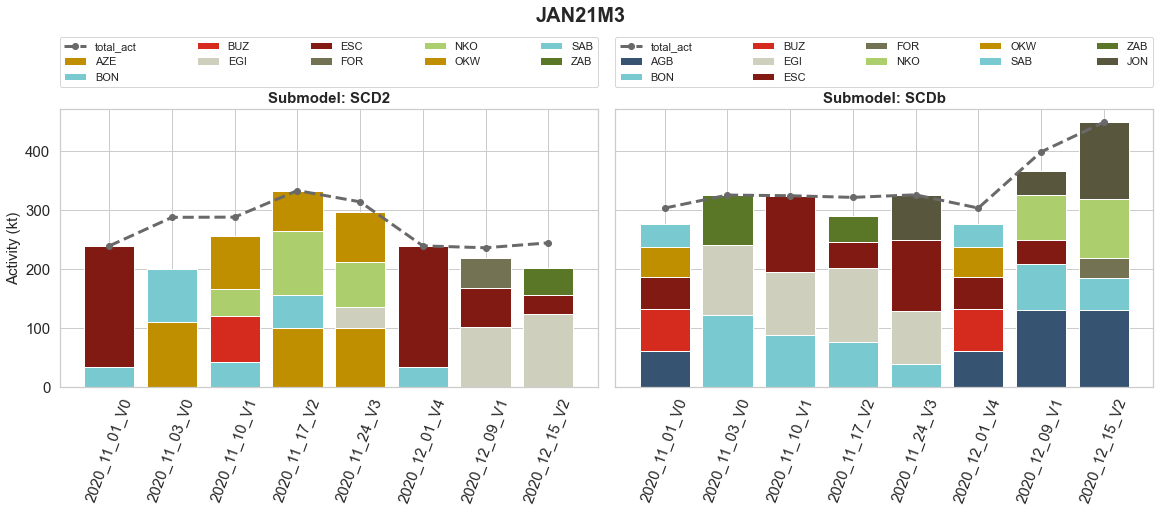

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


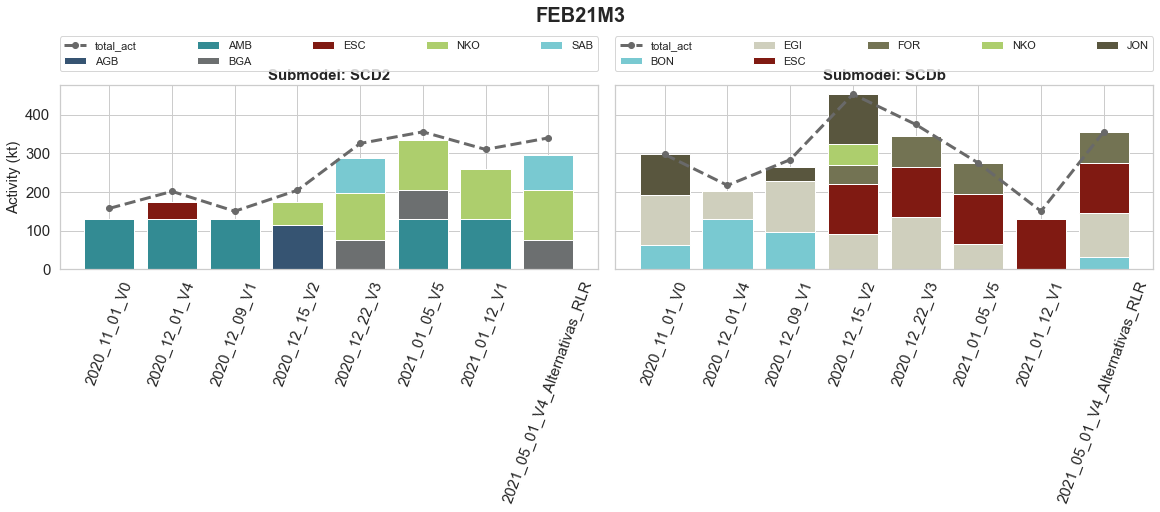

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


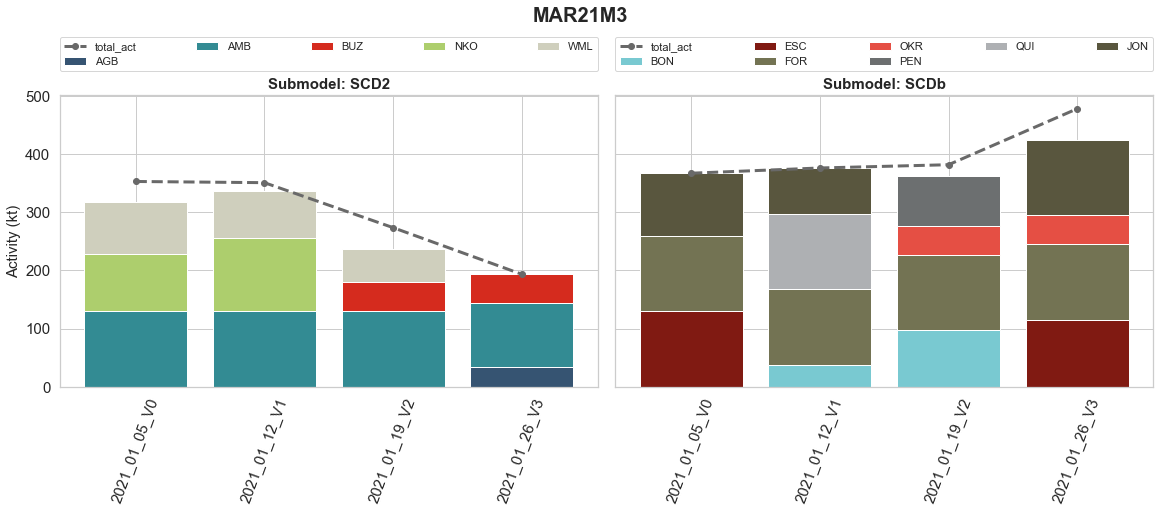

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


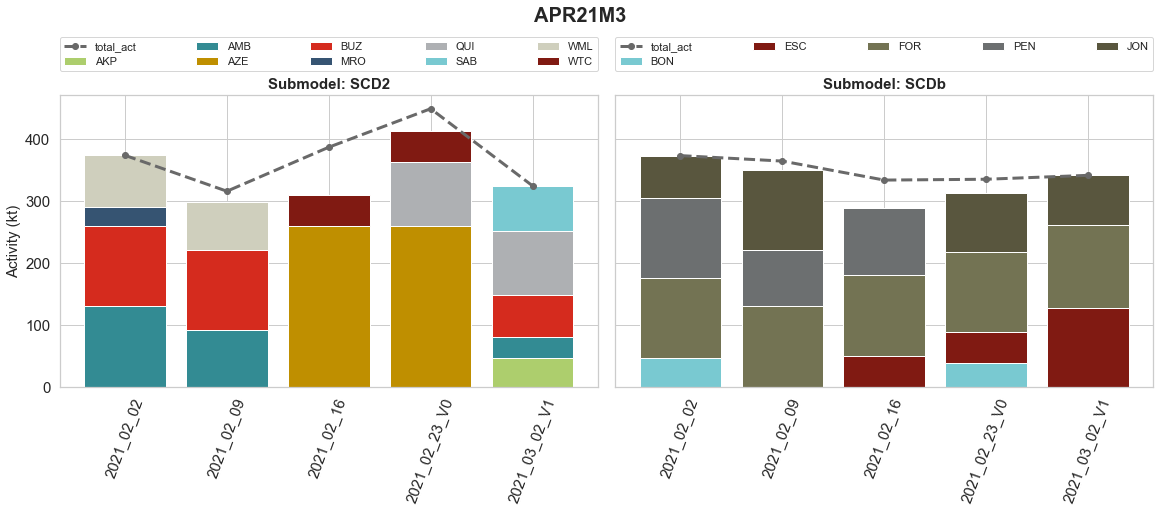

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


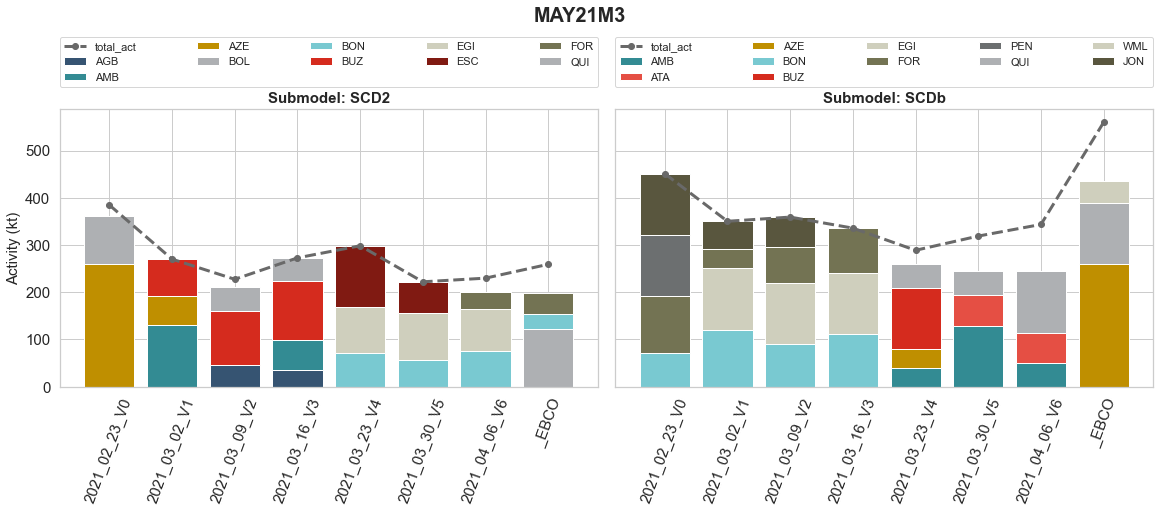

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


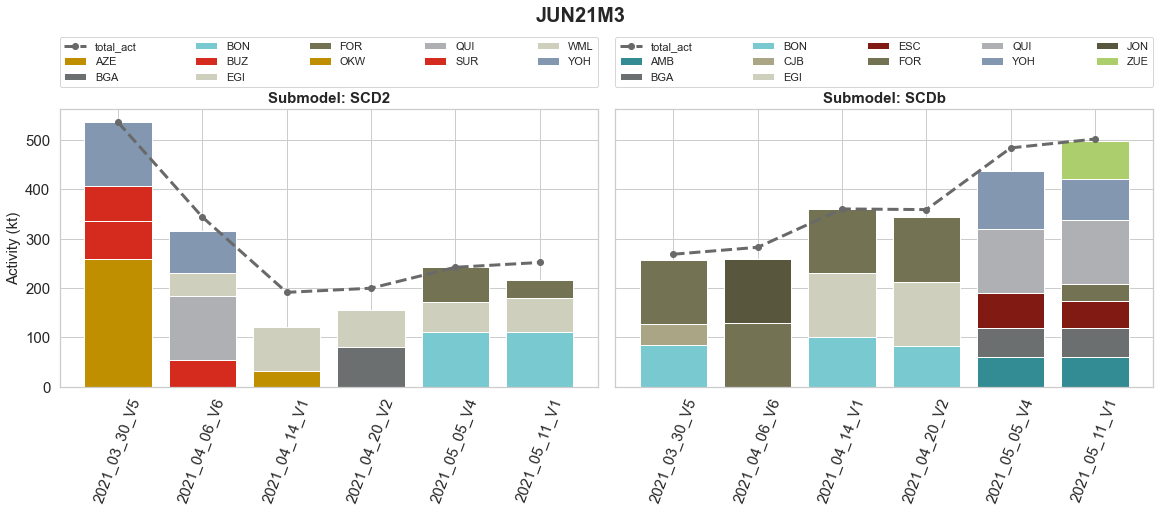

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


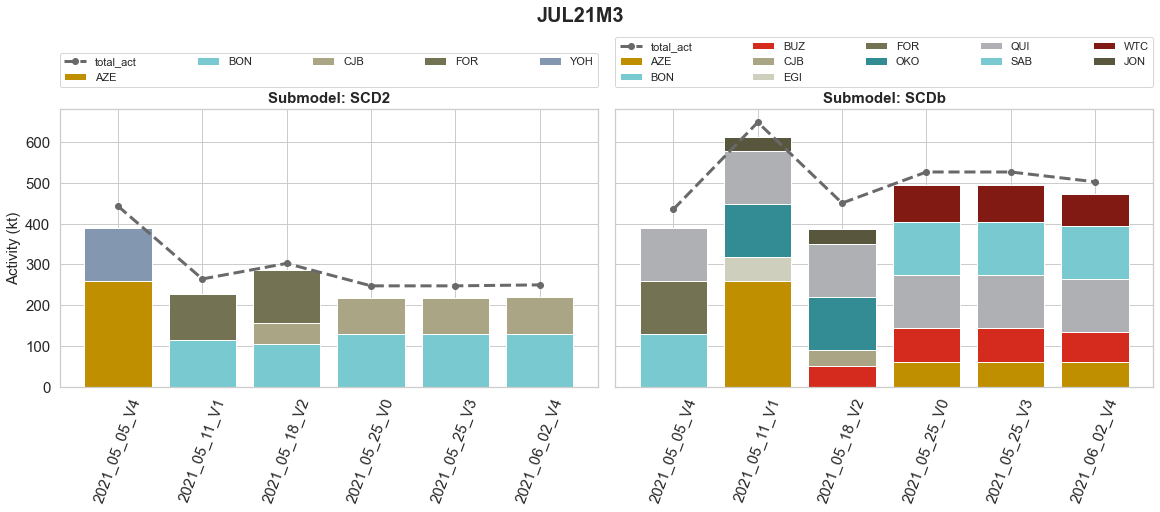

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


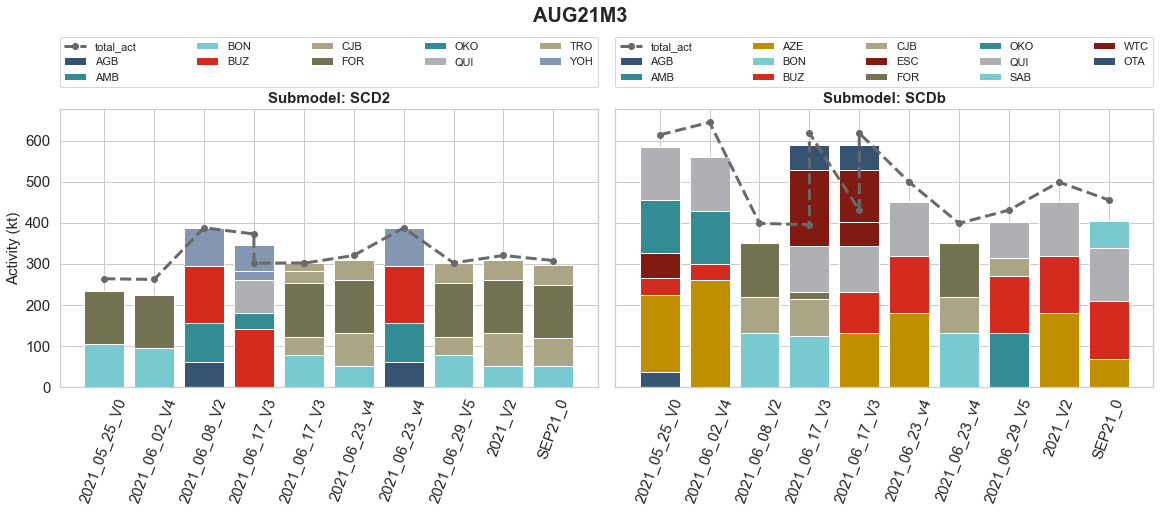

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


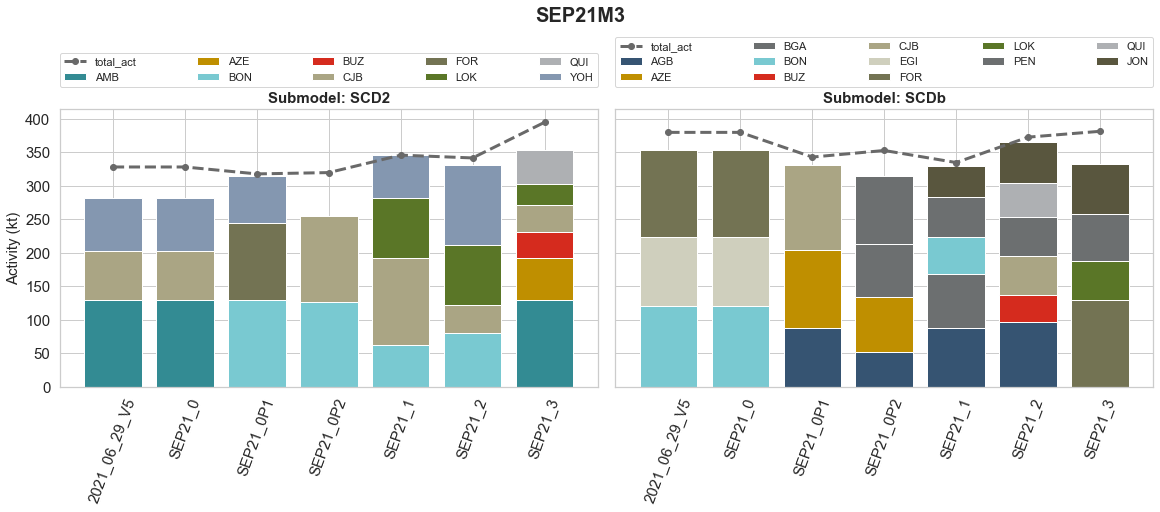

In [11]:
dfs = [table_cd1_crudo, table_cd3_crudo]
# descriptions = ["MAY21M3"]
descriptions = ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

min_activity = 30

for description in descriptions:
    pf.plot_2_pivot_tables_refinery(df_plot, final_columns_to_plot, description, min_activity)

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:418: UserWarning: FixedFormatter should only be used together with FixedLocator
  label = "total_act")
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:418: UserWarning: FixedFormatter should only be used together with FixedLocator
  label = "total_act")


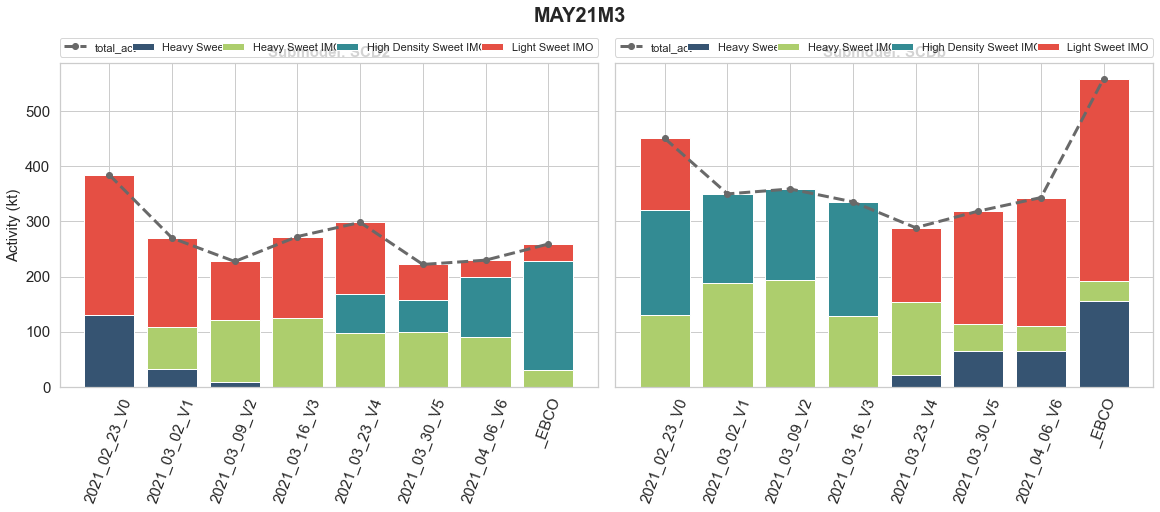

In [11]:
dfs = [table_cd1_imo, table_cd3_imo]
descriptions = ["MAY21M3"]
# descriptions = ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

min_activity = 0

for description in descriptions:
    pf.plot_2_pivot_tables_refinery(df_plot, final_columns_to_plot, description, min_activity)

## Crudo mas usado Algeciras

In [12]:
dfs = [table_cd1_crudo, table_cd3_crudo]
descriptions = ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

In [89]:
df_drop = df_plot[(df_plot["Version"] != "2021_05_01_V4_Alternativas_RLR") &
                  (df_plot["Version"] != "_EBCO")]

df_drop = df_drop.drop_duplicates(subset=["Description", "Submodel"], keep = "last")
df_drop.head(3)

Familia + IMO,Description,Version,CaseID,Submodel,Acid Heavy Sweet,Heavy Sweet,Heavy Sweet IMO,High Density Sweet IMO,Light Sweet,Light Sweet IMO,Month_order,Version_order,Total_activity,Axis,bottom
1,DEC20M3,2020_11_24_V3,12,SCD2,0.0,0.0,0.000000,0.000000,129.987,194.462708,2020-12-01,2020-11-24 00:00:00,324.449707,DEC20M3-2020_11_24_V3,0
9,JAN21M3,2020_12_15_V2,1,SCD2,0.0,0.0,166.897724,16.430334,0.000,60.308607,2021-01-01,2020-12-15 00:00:00,243.636665,JAN21M3-2020_12_15_V2,0
16,FEB21M3,2021_01_12_V1,2,SCD2,0.0,0.0,0.000000,0.000000,29.997,279.772017,2021-02-01,2021-01-12 00:00:00,309.769016,FEB21M3-2021_01_12_V1,0


C:\Users\JESCOBARO\Anaconda3\envs\pilotage_cdx\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


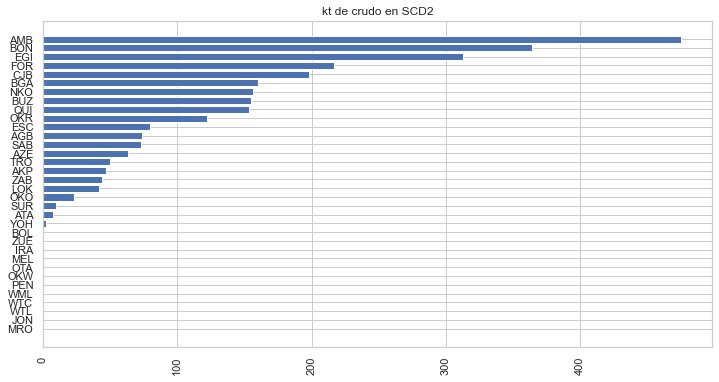

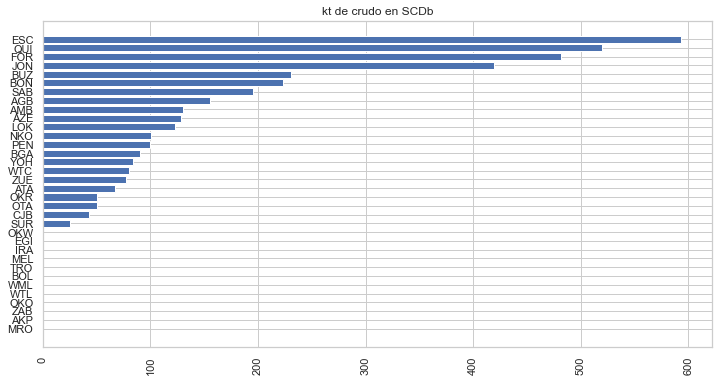

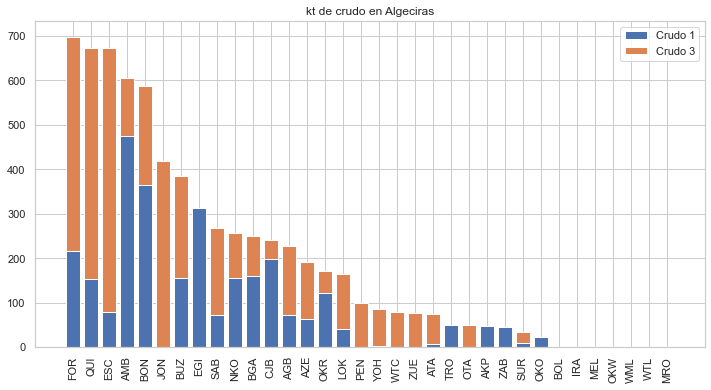

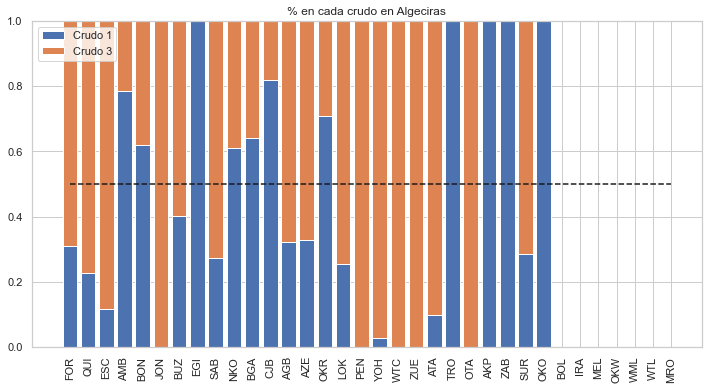

In [86]:
# Crudo 1
df_aux_cd1 = df_drop[df_drop["Submodel"] == "SCD2"]
df_aux_cd1.loc['Column_Total'] = df_aux_cd1.sum(numeric_only = True, axis = 0)
df_aux_cd1 = df_aux_cd1[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True)

fig, ax = plt.subplots(figsize = (12, 6))
ax.barh(df_aux_cd1.index, 
       df_aux_cd1["Column_Total"])
ax.set_title("kt de crudo en SCD2")
plt.xticks(rotation=90)
plt.show();

# Crudo 3
df_aux_cd3 = df_drop[df_drop["Submodel"] == "SCDb"]
df_aux_cd3.loc['Column_Total'] = df_aux_cd3.sum(numeric_only = True, axis = 0)
df_aux_cd3 = df_aux_cd3[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True)

fig, ax = plt.subplots(figsize = (12, 6))
ax.barh(df_aux_cd3.index, 
       df_aux_cd3["Column_Total"])
ax.set_title("kt de crudo en SCDb")
plt.xticks(rotation=90)
plt.show();

# Total Algeciras
df_aux_merge = df_aux_cd1.merge(df_aux_cd3, how="outer", left_on="Crudo", right_on="Crudo", suffixes=('_cd1', '_cd3'))
df_aux_merge["Total_Algeciras"] = df_aux_merge["Column_Total_cd1"] + df_aux_merge["Column_Total_cd3"]
df_aux_merge = df_aux_merge.sort_values(by = "Total_Algeciras", ascending = False)
df_aux_merge["%_cd1"] = df_aux_merge["Column_Total_cd1"]/df_aux_merge["Total_Algeciras"]
df_aux_merge["%_cd3"] = df_aux_merge["Column_Total_cd3"]/df_aux_merge["Total_Algeciras"]
df_aux_merge["0,5"] = 0.5

fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(df_aux_merge.index, df_aux_merge["Column_Total_cd1"], label = 'Crudo 1')
ax.bar(df_aux_merge.index, df_aux_merge["Column_Total_cd3"], bottom = df_aux_merge["Column_Total_cd1"], label = 'Crudo 3')
ax.set_title("kt de crudo en Algeciras")
ax.legend()
plt.xticks(rotation = 90)
plt.show();

fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(df_aux_merge.index, df_aux_merge["%_cd1"], label = 'Crudo 1')
ax.bar(df_aux_merge.index, df_aux_merge["%_cd3"], bottom = df_aux_merge["%_cd1"], label = 'Crudo 3')
ax.plot(df_aux_merge.index, df_aux_merge["0,5"], "k--")
ax.set_title("% en cada crudo en Algeciras")
ax.legend()
plt.xticks(rotation = 90)
plt.show();

In [87]:
display(df_algeciras[df_algeciras["Crudo"] == "AMB"].head(1))
display(df_algeciras[df_algeciras["Crudo"] == "FOR"].head(1))

,Mes,Version,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
27630,01_January_2021,2020_11_10_V1,658514001,1,SCD2AMBA,6.456633,SCD2,AMB,A,2020-11-12 16:34:39,5.0,658514001_1,JAN21M3,84035.21875,72,AMB,AMENAM BLEND,AMB,AB0,38.98,0.09,7.595336,Light Sweet IMO,Nigeria,West Africa,0.179659,6.087387


,Mes,Version,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
250108,02_February_2021,2020_12_09_V1,660993092,2,SCDbFORA,19.997999,SCDb,FOR,A,2020-12-11 09:12:27,5.0,660993092_2,FEB21M3,98128.257812,50,FOR,FORCADOS,FOR,FO0,32.6,0.14,7.31109,High Density Sweet IMO,Nigeria,West Africa,0.474339,5.927838


## Familia mas usada en Algeciras

In [13]:
dfs = [table_cd1_imo, table_cd3_imo]
descriptions = ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

In [91]:
df_drop = df_plot[(df_plot["Version"] != "2021_05_01_V4_Alternativas_RLR") &
                  (df_plot["Version"] != "_EBCO")]

df_drop = df_drop.drop_duplicates(subset=["Description", "Submodel"], keep = "last")
df_drop.head(3)

Familia + IMO,Description,Version,CaseID,Submodel,Acid Heavy Sweet,Heavy Sweet,Heavy Sweet IMO,High Density Sweet IMO,Light Sweet,Light Sweet IMO,Month_order,Version_order,Total_activity,Axis,bottom
1,DEC20M3,2020_11_24_V3,12,SCD2,0.0,0.0,0.000000,0.000000,129.987,194.462708,2020-12-01,2020-11-24 00:00:00,324.449707,DEC20M3-2020_11_24_V3,0
9,JAN21M3,2020_12_15_V2,1,SCD2,0.0,0.0,166.897724,16.430334,0.000,60.308607,2021-01-01,2020-12-15 00:00:00,243.636665,JAN21M3-2020_12_15_V2,0
16,FEB21M3,2021_01_12_V1,2,SCD2,0.0,0.0,0.000000,0.000000,29.997,279.772017,2021-02-01,2021-01-12 00:00:00,309.769016,FEB21M3-2021_01_12_V1,0


C:\Users\JESCOBARO\Anaconda3\envs\pilotage_cdx\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


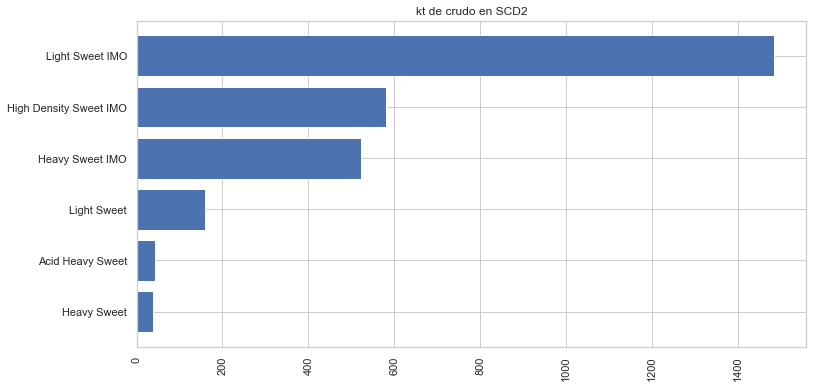

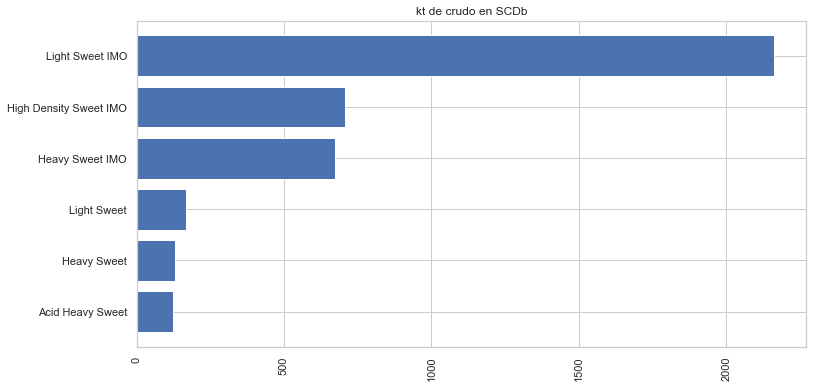

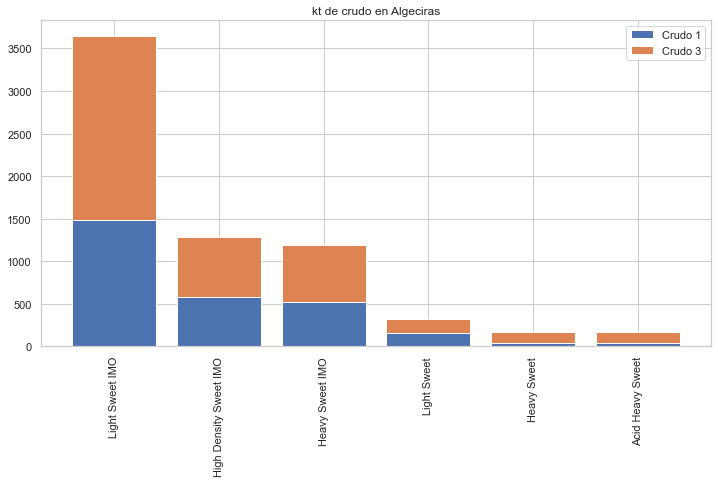

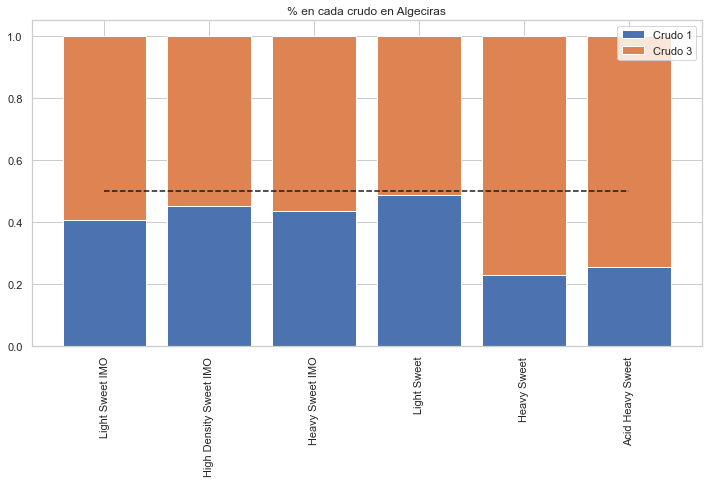

In [92]:
# Crudo 1
df_aux_cd1 = df_drop[df_drop["Submodel"] == "SCD2"]
df_aux_cd1.loc['Column_Total'] = df_aux_cd1.sum(numeric_only = True, axis = 0)
df_aux_cd1 = df_aux_cd1[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True)

fig, ax = plt.subplots(figsize = (12, 6))
ax.barh(df_aux_cd1.index, 
       df_aux_cd1["Column_Total"])
ax.set_title("kt de crudo en SCD2")
plt.xticks(rotation=90)
plt.show();

# Crudo 3
df_aux_cd3 = df_drop[df_drop["Submodel"] == "SCDb"]
df_aux_cd3.loc['Column_Total'] = df_aux_cd3.sum(numeric_only = True, axis = 0)
df_aux_cd3 = df_aux_cd3[final_columns_to_plot].transpose().sort_values(by = "Column_Total", ascending = True)

fig, ax = plt.subplots(figsize = (12, 6))
ax.barh(df_aux_cd3.index, 
       df_aux_cd3["Column_Total"])
ax.set_title("kt de crudo en SCDb")
plt.xticks(rotation=90)
plt.show();

# Total Algeciras
df_aux_merge = df_aux_cd1.merge(df_aux_cd3, how="outer", left_on="Familia + IMO", right_on="Familia + IMO", suffixes=('_cd1', '_cd3'))
df_aux_merge["Total_Algeciras"] = df_aux_merge["Column_Total_cd1"] + df_aux_merge["Column_Total_cd3"]
df_aux_merge = df_aux_merge.sort_values(by = "Total_Algeciras", ascending = False)
df_aux_merge["%_cd1"] = df_aux_merge["Column_Total_cd1"]/df_aux_merge["Total_Algeciras"]
df_aux_merge["%_cd3"] = df_aux_merge["Column_Total_cd3"]/df_aux_merge["Total_Algeciras"]
df_aux_merge["0,5"] = 0.5

fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(df_aux_merge.index, df_aux_merge["Column_Total_cd1"], label = 'Crudo 1')
ax.bar(df_aux_merge.index, df_aux_merge["Column_Total_cd3"], bottom = df_aux_merge["Column_Total_cd1"], label = 'Crudo 3')
ax.set_title("kt de crudo en Algeciras")
ax.legend()
plt.xticks(rotation = 90)
plt.show();

fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(df_aux_merge.index, df_aux_merge["%_cd1"], label = 'Crudo 1')
ax.bar(df_aux_merge.index, df_aux_merge["%_cd3"], bottom = df_aux_merge["%_cd1"], label = 'Crudo 3')
ax.plot(df_aux_merge.index, df_aux_merge["0,5"], "k--")
ax.set_title("% en cada crudo en Algeciras")
ax.legend()
plt.xticks(rotation = 90)
plt.show();

## Estudio con AMENAM, AMB

In [9]:
dfs = [table_cd1_crudo, table_cd3_crudo]
descriptions = ['DEC20M3', 'JAN21M3', 'FEB21M3', 'MAR21M3', 'APR21M3', 'MAY21M3', 'JUN21M3', 'JUL21M3', 'AUG21M3', 'SEP21M3']

df_plot, final_columns_to_plot = pf.concat_pt_plot_and_columns_plot(dfs, descriptions, print_returns = False)

C:\Users\JESCOBARO\Anaconda3\envs\pilotage_cdx\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


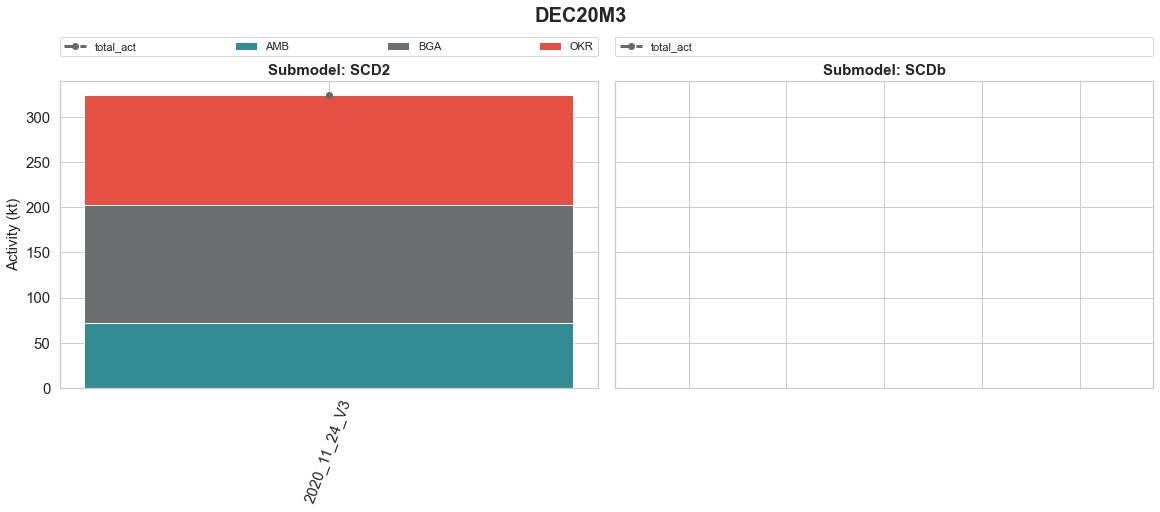

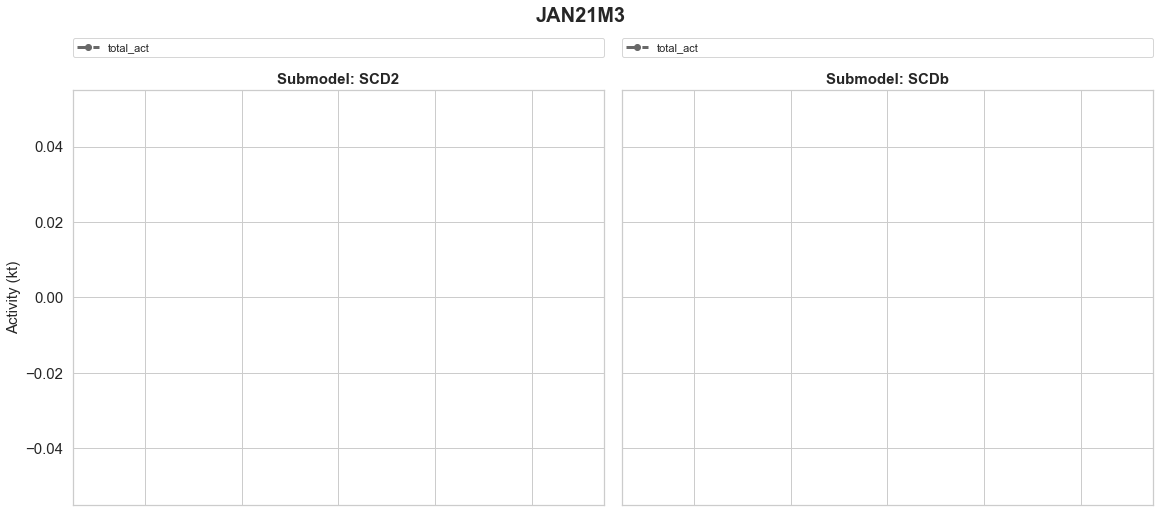

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


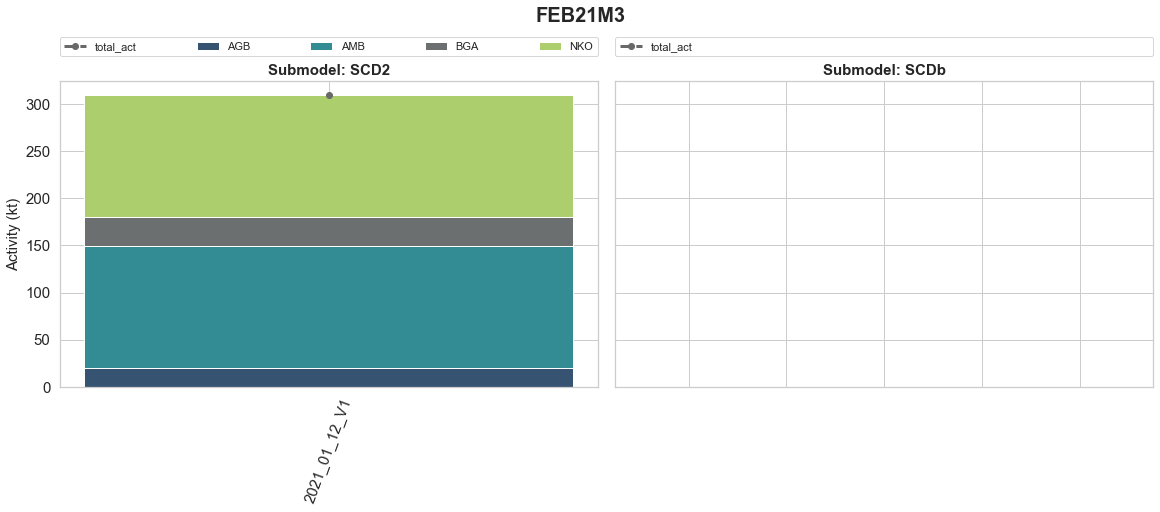

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)
C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


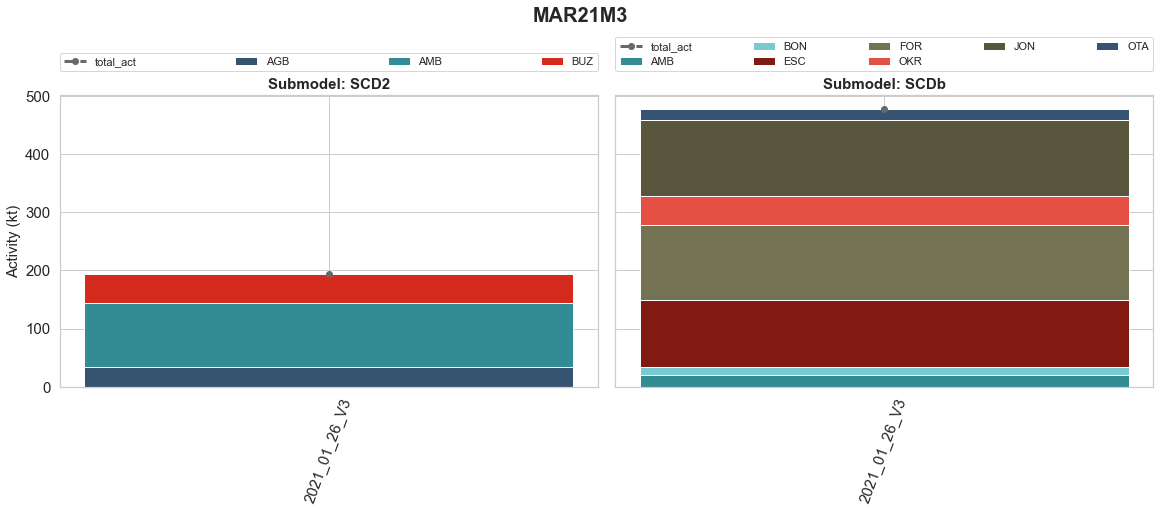

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


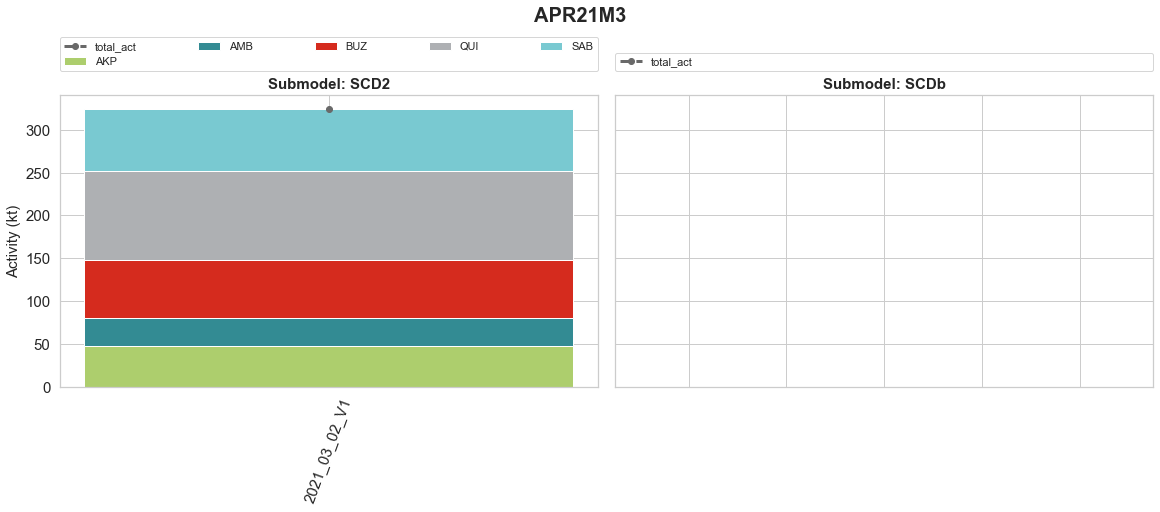

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


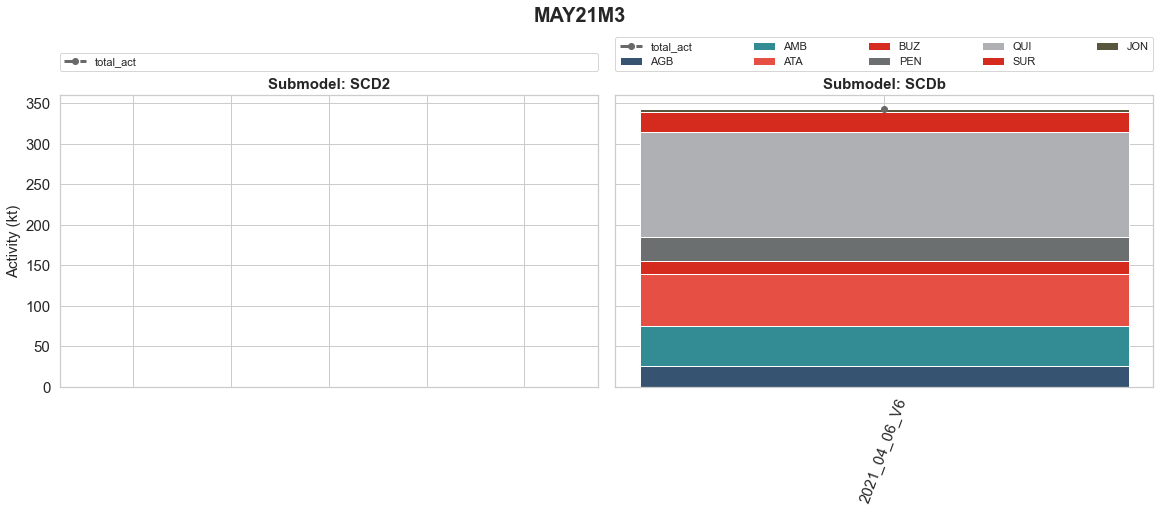

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


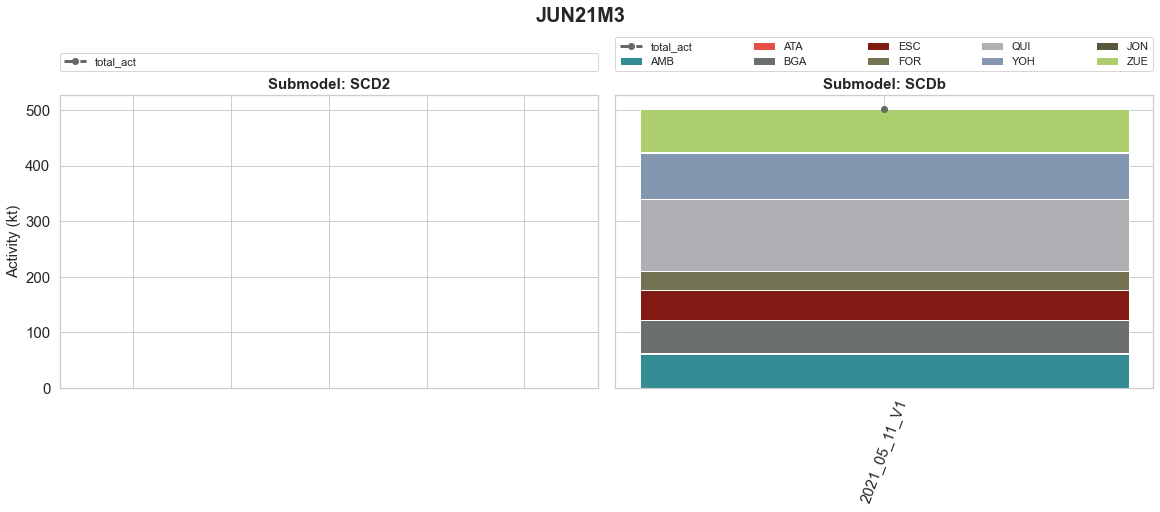

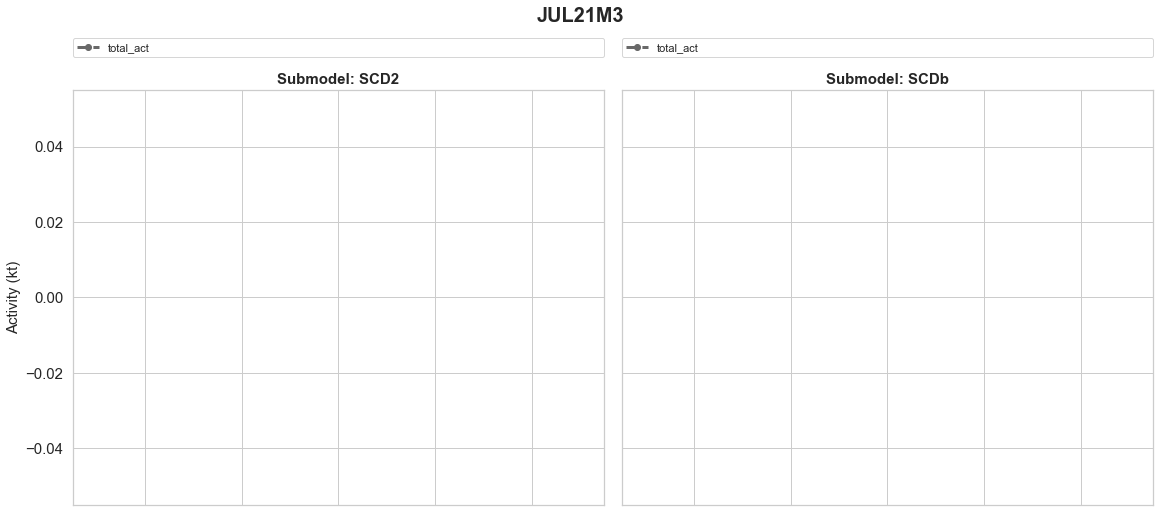

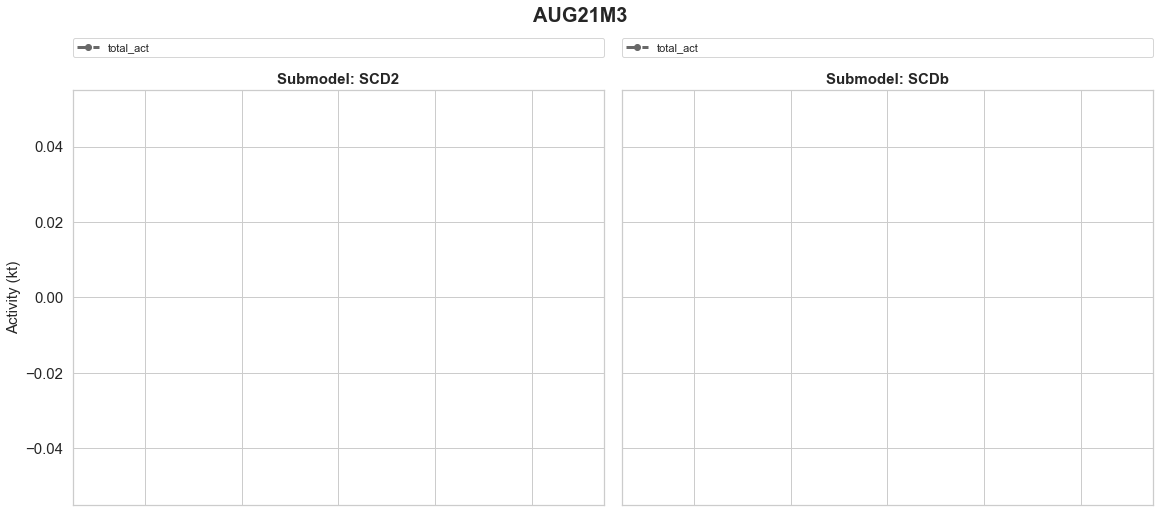

C:\Users\JESCOBARO\PILOTAGE\cdx_pilotage\pims_functions.py:421: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_aux.Axis.str[8:], rotation = 70, fontsize = 15)


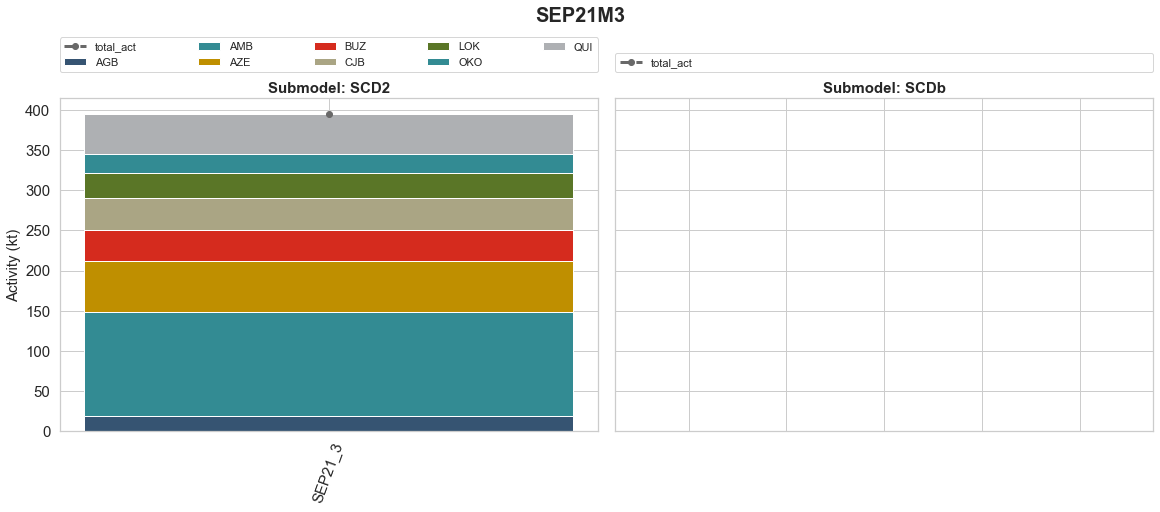

In [10]:
df_drop = df_plot[(df_plot["Version"] != "2021_05_01_V4_Alternativas_RLR") &
                  (df_plot["Version"] != "_EBCO")]

df_drop = df_drop.drop_duplicates(subset=["Description", "Submodel"], keep = "last")

# df_aux = df_drop[df_drop["Submodel"] == "SCD2"]
df_aux = df_drop[df_drop["AMB"] > 0]
df_aux["%AMB"] = df_aux["AMB"] / df_aux["Total_activity"]
df_aux = df_aux.sort_values(by = "%AMB", ascending = False)

min_AMB = 0
df_aux = df_aux[df_aux["%AMB"] > min_AMB]

min_activity = 0

for description in descriptions:
    pf.plot_2_pivot_tables_refinery(df_aux, final_columns_to_plot, description, min_activity)

In [13]:
df_aux2 = df_aux.select_dtypes(include=['float64', 'int'])
df_aux2 = df_aux2.drop(["Total_activity", "%AMB"], axis = 1)
df_aux2.columns.name = None
df_aux2

,AGB,AKP,AMB,ATA,AZE,BGA,BOL,BON,BUZ,CJB,EGI,ESC,FOR,IRA,LOK,MEL,MRO,NKO,OKO,OKR,OKW,PEN,QUI,SAB,SUR,TRO,WML,WTC,WTL,YOH,ZAB,JON,OTA,ZUE
21,34.489101,0.000000,109.108353,0.000000,0.000000,0.000000,0.0,0.00000,49.845001,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000
16,19.997999,0.000000,129.887009,0.000000,0.000000,29.997000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,129.887009,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000
65,19.005520,0.000000,129.770096,0.000000,63.108921,0.000000,0.0,0.00000,38.141201,40.182022,0.0,0.000000,0.000000,0.0,32.007862,0.0,0.0,0.000000,22.840229,0.000000,0.0,0.000000,49.950001,0.00000,0.000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000
1,0.000000,0.000000,72.159950,0.000000,0.000000,129.987000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,122.302757,0.0,0.000000,0.000000,0.00000,0.000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000
99,24.975000,0.000000,49.434277,64.934998,0.000000,0.000000,0.0,0.00000,15.785532,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,29.886406,129.869995,0.00000,24.975,0.0,0.0,0.0,0.0,0.00000,0.0,3.610023,0.00000,0.000000
106,0.000000,0.000000,59.939999,2.595312,0.000000,59.939999,0.0,0.00000,0.000000,0.000000,0.0,53.827824,33.846695,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,129.869995,0.00000,0.000,0.0,0.0,0.0,0.0,83.47699,0.0,0.998111,0.00000,77.643814
26,0.000000,47.011738,33.716251,0.000000,0.000000,0.000000,0.0,0.00000,67.047371,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,103.646248,73.34993,0.000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000
87,0.000000,0.000000,20.761650,0.000000,0.000000,0.000000,0.0,12.88694,0.000000,0.000000,0.0,115.118202,129.869995,0.0,0.000000,0.0,0.0,0.000000,0.000000,49.950001,0.0,0.000000,0.000000,0.00000,0.000,0.0,0.0,0.0,0.0,0.00000,0.0,129.869995,19.97139,0.000000


In [17]:
corr_matrix = df_aux2.corr(method='pearson')
pd.DataFrame(corr_matrix["AMB"])

,AMB
AGB,0.629109
AKP,-0.397176
AMB,1.000000
ATA,-0.255306
AZE,0.513746
BGA,0.017420
BOL,NaN
BON,-0.520030
BUZ,0.064447
CJB,0.513746


In [40]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_mat = tidy_corr_matrix(corr_matrix)

corr_mat[corr_mat["variable_1"] == "AMB"]

,variable_1,variable_2,r,abs_r
27,AMB,AKP,-0.823741,0.823741
38,AMB,SAB,-0.823741,0.823741
26,AMB,AGB,0.754906,0.754906
37,AMB,QUI,-0.600399,0.600399
34,AMB,NKO,0.470445,0.470445
32,AMB,CJB,0.468871,0.468871
29,AMB,AZE,0.468871,0.468871
35,AMB,OKO,0.468871,0.468871
33,AMB,LOK,0.468871,0.468871
31,AMB,BUZ,-0.413358,0.413358


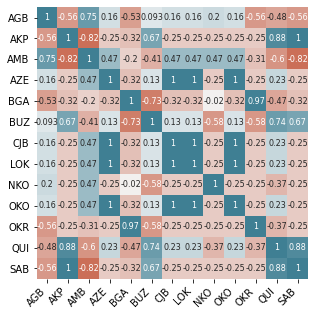

In [39]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
Como reparte las familias entre los 2 crudos
Coger un crudo y ver con que lo mezcla en cada torre. Coger por submodel todos los meses y ver si mete ESC y si lo mezcla

El tema del GOL, foa: (GL2, RA2 en crudo 1 SCD2)
Necesitariamos de una version, ver las propiedades que tenga el GOL en un submodelo. (tabla con quality, tabla enlace submodel con producto + rto (PrimalColumn))
Ver evolucion propiedad con la mezcla segregado por modos